In [29]:
import json
import os
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [30]:
y = [1, 2, 4, 8, 16, 32]

In [31]:
def get_all_dict(file_paths):
    array_of_dicts = [] 
    for file_path in file_paths:
        if os.path.isfile(file_path):  # Check if the file exists
            with open(file_path, 'r') as file:
                try:
                    # Load the file content as a dictionary
                    data = json.load(file)
                    # Append the dictionary to the array
                    array_of_dicts.append(data)
                except json.JSONDecodeError as e:
                    print(f"Error decoding JSON from {file_path}: {e}")
    return array_of_dicts

In [32]:
file_paths = ['m5a.2xlarge_1.data.json', 'm5a.2xlarge_2.data.json', 'm5a.2xlarge_4.data.json', 'm5a.2xlarge_8.data.json', 'm5a.2xlarge_16.data.json', 'm5a.2xlarge_32.data.json']
array_of_dicts = get_all_dict(file_paths=file_paths)

In [33]:
insertion_user_time_arr = [] 
insertion_item_time_arr = [] 
insertion_user_item_time_arr = [] 
query_time_arr = [] 
for dict_i in array_of_dicts: 
    insertion_user_time_arr.append(dict_i['insert_1000_users'])
    insertion_item_time_arr.append(dict_i['insert_1000_items'])
    insertion_user_item_time_arr.append(dict_i['insert_5_items_per_users'])
    query_time_arr.append(dict_i['query_users'])

In [34]:
insertion_user_time_arr

[401.1834466457367,
 198.4423382282257,
 100.39892387390137,
 54.76544737815857,
 25.25100827217102,
 18.05942726135254]

In [35]:
query_time_arr

[250.8588399887085,
 126.38654398918152,
 63.21664595603943,
 31.779719352722168,
 35.380483865737915,
 12.99031138420105]

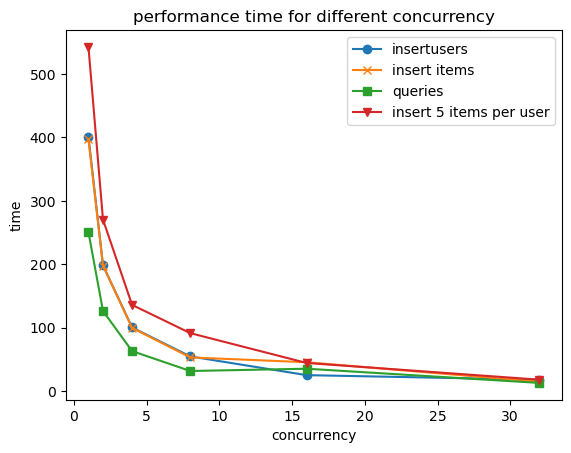

In [36]:
plt.figure()

# Plot each array with different styles
plt.plot(y, insertion_user_time_arr, label='insertusers', marker='o')
plt.plot(y, insertion_item_time_arr, label='insert items', marker='x')
plt.plot(y, query_time_arr, label='queries', marker='s')
plt.plot(y, insertion_user_item_time_arr, label='insert 5 items per user', marker='v')

# Add labels and title
plt.xlabel('concurrency')
plt.ylabel('time')
plt.title('performance time for different concurrency')

# Add a legend
plt.legend()

# Show the plot
plt.show()

# Latencies

In [37]:
file_paths = ['m5a.large_8.data.json', 'm5a.large_16.data.json', 'm5a.large_32.data.json']
array_of_dicts = get_all_dict(file_paths=file_paths)

In [38]:
connection_time = []
insertion_time = [] 
insertion_time_without_connection = [] 
inserting_five_items = [] 
inserting_five_items_without_connection = [] 
query_time = [] 
query_time_without_connection = [] 

for dict_i in array_of_dicts: 
    connection_time.append(dict_i['connection_time'])
    insertion_time.append(dict_i['insert_one_user_with_connection'])
    insertion_time_without_connection.append(dict_i['insert_one_user_without_connection'])
    inserting_five_items.append(dict_i['insert_5_items_one_users_with_connection'])
    inserting_five_items_without_connection.append(dict_i['insert_5_items_one_users_without_connection'])
    query_time.append(dict_i['query_one_with_connection'])
    query_time_without_connection.append(dict_i['query_one_without_connection'])

In [39]:
connection_time = np.mean(connection_time)
insertion_time = np.mean(insertion_time)
insertion_time_without_connection = np.mean(insertion_time_without_connection)
inserting_five_items = np.mean(inserting_five_items)
inserting_five_items_without_connection = np.mean(inserting_five_items_without_connection)
query_time = np.mean(query_time)
query_time_without_connection = np.mean(query_time_without_connection)



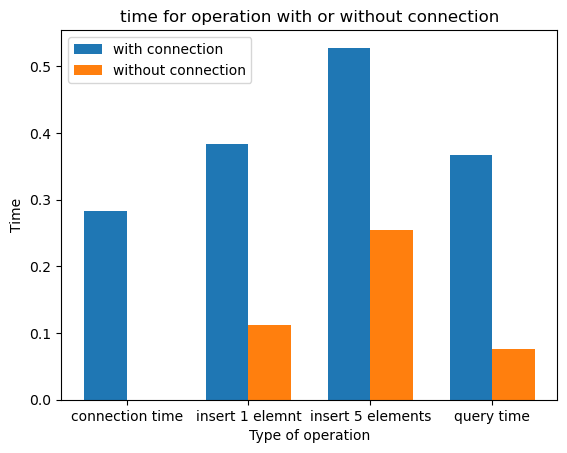

In [40]:
categories = ['connection time', 'insert 1 elemnt', 'insert 5 elements', 'query time']
with_connection = [connection_time, insertion_time, inserting_five_items, query_time]
without_connection = [0, insertion_time_without_connection, inserting_five_items_without_connection, query_time_without_connection]

# Number of categories
N = len(categories)

# Create a new figure for the plot
fig, ax = plt.subplots()

# Create an array with the positions of the bars on the x-axis
ind = np.arange(N)

# Width of the bars
width = 0.35

# Plot bars for parameter 1
p1 = ax.bar(ind, with_connection, width, label='with connection')

# Plot bars for parameter 2
p2 = ax.bar(ind + width, without_connection, width, label='without connection')

# Add some text for labels, title and axes ticks
ax.set_xlabel('Type of operation')
ax.set_ylabel('Time')
ax.set_title('time for operation with or without connection')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(categories)
ax.legend()

# Display the plot
plt.show()


# m5a data

In [41]:
file_paths = ['m5a.large_16.data.json', 'm5a.xlarge_16.data.json', 'm5a.2xlarge_16.data.json']
array_of_dicts = get_all_dict(file_paths=file_paths)

In [42]:
m5_insert_1000_users = [] 
m5_insert_1000_items = [] 
m5_insert_5000_user_items = [] 
m5_query_time = [] 

for dict_i in array_of_dicts: 
    m5_insert_1000_users.append(dict_i['insert_1000_users'])
    m5_insert_1000_items.append(dict_i['insert_1000_items'])
    m5_insert_5000_user_items.append(dict_i['insert_5_items_per_users'])
    m5_query_time.append(dict_i['query_users'])

# T3 data

In [43]:
file_paths = ['t3.large_16.data.json', 't3.xlarge_16.data.json', 't3.2xlarge_16.data.json']
array_of_dicts = get_all_dict(file_paths=file_paths)

In [44]:
t3_insert_1000_users = [] 
t3_insert_1000_items = [] 
t3_insert_5000_user_items = [] 
t3_query_time = [] 

for dict_i in array_of_dicts: 
    t3_insert_1000_users.append(dict_i['insert_1000_users'])
    t3_insert_1000_items.append(dict_i['insert_1000_items'])
    t3_insert_5000_user_items.append(dict_i['insert_5_items_per_users'])
    t3_query_time.append(dict_i['query_users'])

# T2 data

In [45]:
file_paths = ['t2.medium_16.data.json', 't2.xlarge_16.data.json', 't2.2xlarge_16.data.json']
array_of_dicts = get_all_dict(file_paths=file_paths)

In [46]:
t2_insert_1000_users = [] 
t2_insert_1000_items = [] 
t2_insert_5000_user_items = [] 
t2_query_time = [] 

for dict_i in array_of_dicts: 
    t2_insert_1000_users.append(dict_i['insert_1000_users'])
    t2_insert_1000_items.append(dict_i['insert_1000_items'])
    t2_insert_5000_user_items.append(dict_i['insert_5_items_per_users'])
    t2_query_time.append(dict_i['query_users'])

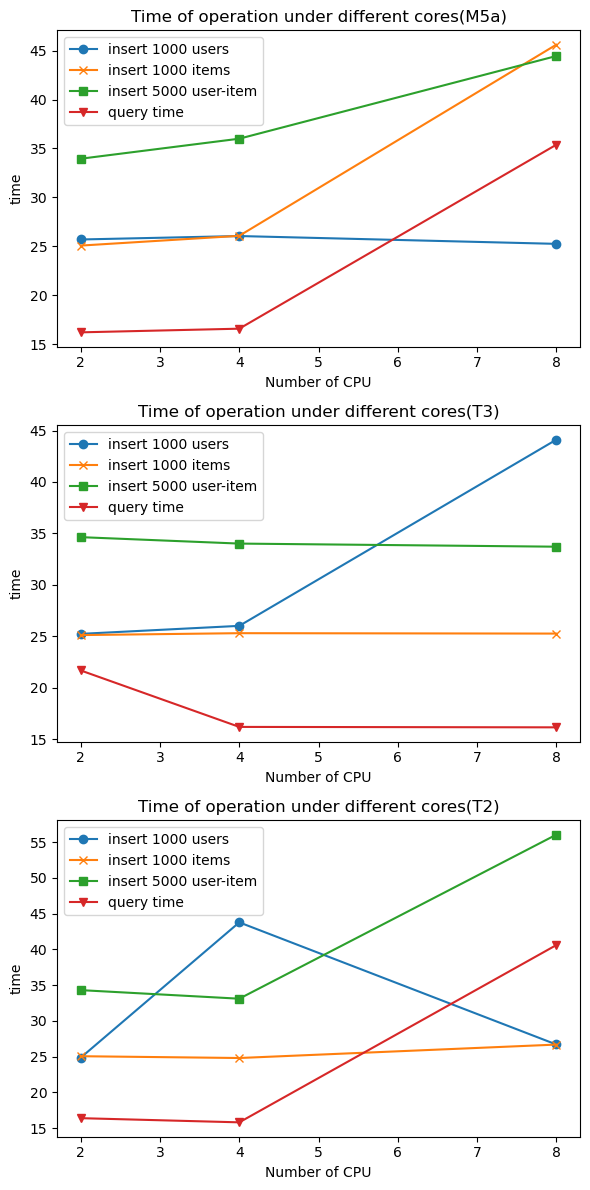

In [47]:
x = [2, 4, 8]
fig, axs = plt.subplots(3, 1, figsize=(6, 6))
# Plot each array with different styles
axs[0].plot(x, m5_insert_1000_users, label='insert 1000 users', marker='o')
axs[0].plot(x, m5_insert_1000_items, label='insert 1000 items', marker='x')
axs[0].plot(x, m5_insert_5000_user_items, label='insert 5000 user-item', marker='s')
axs[0].plot(x, m5_query_time, label='query time', marker='v')

# Add labels and title
axs[0].set_xlabel('Number of CPU')
axs[0].set_ylabel('time')
axs[0].set_title('Time of operation under different cores(M5a)')

axs[1].plot(x, t3_insert_1000_users, label='insert 1000 users', marker='o')
axs[1].plot(x, t3_insert_1000_items, label='insert 1000 items', marker='x')
axs[1].plot(x, t3_insert_5000_user_items, label='insert 5000 user-item', marker='s')
axs[1].plot(x, t3_query_time, label='query time', marker='v')

# Add labels and title
axs[1].set_xlabel('Number of CPU')
axs[1].set_ylabel('time')
axs[1].set_title('Time of operation under different cores(T3)')

axs[2].plot(x, t2_insert_1000_users, label='insert 1000 users', marker='o')
axs[2].plot(x, t2_insert_1000_items, label='insert 1000 items', marker='x')
axs[2].plot(x, t2_insert_5000_user_items, label='insert 5000 user-item', marker='s')
axs[2].plot(x, t2_query_time, label='query time', marker='v')

# Add labels and title
axs[2].set_xlabel('Number of CPU')
axs[2].set_ylabel('time')
axs[2].set_title('Time of operation under different cores(T2)')

# Add a legend
axs[0].legend()
axs[1].legend()
axs[2].legend()

# Show the plot
plt.tight_layout()
plt.show()

# T3 data

In [21]:
file_paths = ['m5a.large_16.data.json', 'm5a.xlarge_16.data.json', 'm5a.2xlarge_16.data.json']
array_of_dicts = get_all_dict(file_paths=file_paths)

In [23]:
len(array_of_dicts)

3

In [24]:
insert_one_user_with_connection = [] 
insert_one_user_without_connection = [] 
insert_5_items_one_users_with_connection = [] 
insert_5_items_one_users_without_connection = [] 
query_one_with_connection = [] 
query_one_without_connection = [] 
for dict_i in array_of_dicts: 
    insert_one_user_with_connection.append(dict_i['insert_one_user_with_connection'])
    insert_one_user_without_connection.append(dict_i['insert_one_user_without_connection'])
    insert_5_items_one_users_with_connection.append(dict_i['insert_5_items_one_users_with_connection'])
    insert_5_items_one_users_without_connection.append(dict_i['insert_5_items_one_users_without_connection'])
    query_one_with_connection.append(dict_i['query_one_with_connection'])
    query_one_without_connection.append(dict_i['query_one_without_connection'])

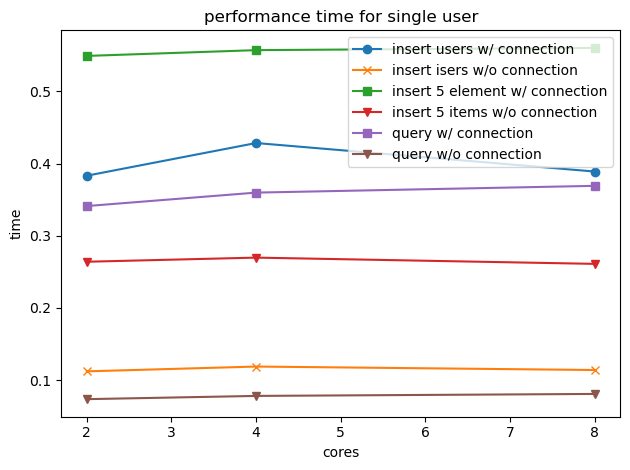

In [28]:
x = [2, 4, 8]
plt.figure()

# Plot each array with different styles
plt.plot(x, insert_one_user_with_connection, label='insert users w/ connection', marker='o')
plt.plot(x, insert_one_user_without_connection, label='insert isers w/o connection', marker='x')
plt.plot(x, insert_5_items_one_users_with_connection, label='insert 5 element w/ connection', marker='s')
plt.plot(x, insert_5_items_one_users_without_connection, label='insert 5 items w/o connection', marker='v')
plt.plot(x, query_one_with_connection, label='query w/ connection', marker='s')
plt.plot(x, query_one_without_connection, label='query w/o connection', marker='v')

# Add labels and title
plt.xlabel('cores')
plt.ylabel('time')
plt.title('performance time for single user')

# Add a legend
plt.legend()
plt.tight_layout()
# Show the plot
plt.show()
